In [1]:
import numpy as np
import matplotlib.pyplot as plt



/tmp/ipykernel_640611/3793044189.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  result[:, 0] = E


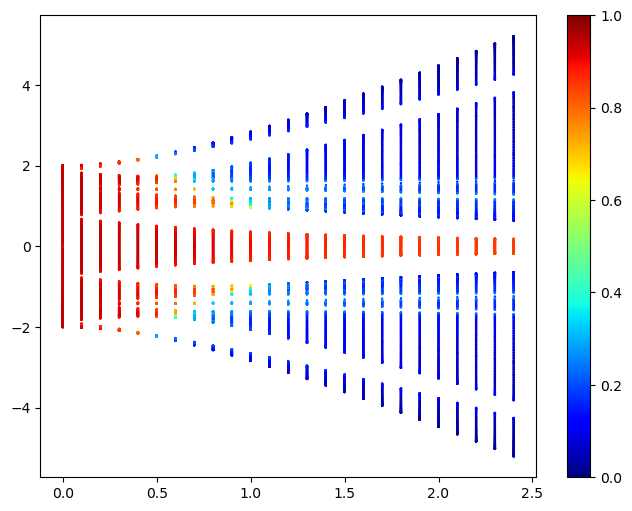

In [2]:

def cal_FD_of_all_state(h):
    """
    Calculate fractal dimension(FD) for all eigenstates of h.
    
    Return an (L, 2) array containing all the energy in page 1, all the FD in page 2.

    `| \\psi_m \\rangle = \\sum_j^L u_{m,j} c^\\dagger_j | vac \\rangle`

    `IPR(m) = \\sum_j u_{m,j}^4`

    FD: `\\eta = - \\lim_{L \\to \\infty} \\ln (IPR) / \\ln L`
    """
    L = len(h)
    result = np.zeros((L, 2))
    E, VR = np.linalg.eig(h)
    result[:, 0] = E
    IPR = np.sum(np.abs(VR) ** 4, axis=0)
    eta = - np.log(IPR) / np.log(L)
    result[:, 1] = eta
    return result

def vis_energy_spectrum(x_array, FD):
    """
    x_array: N-parameters
    
    FD: (N, L, 2) array

    Having N-parameters.

    Containing all the energy in page 1, all the FD in page 2.
    """
    N = np.size(FD, 0)  # np.size axis 从0开始
    L = np.size(FD, 1)
    if N != np.size(x_array, 0):
        print("Error")
        return
    plt.figure(figsize=(8, 6))
    for i in range(L):
        plt.scatter(x_array, FD[:, i, 0], c=FD[:, i, 1], cmap=plt.cm.jet, vmin=0, vmax=1, s=0.5)  # vmin, vmax 固定 cmap 映射的最大值和最小值，不然会对每次循环的数据用不同的 norm，画出来的颜色就是乱的！
    plt.colorbar()  # 这里的 colorbar 显示的就是最后一次循环绘图时用的 norm，如果上一行循环里没设定 norm 或者 vmin, vmax，那这个 colorbar 是对应不上的！
    plt.show()



def fibonacci(n):
    if not(type(n) == int) or n < 0:
        return
    if n == 0 or n == 1:
        return 1
    else:
        f = fibonacci(n-1) + fibonacci(n-2)
        return f

def gen_H_mosaic1_real(L, t0, Mz, beta, phi=0):
    Ham = np.zeros((L, L), dtype=np.complex128)
    for i in range(L - 1):
        Ham[i + 1, i] = t0
        Ham[i, i + 1] = t0
    for i in range(L):
        if i % 2 == 0:
            Ham[i, i] = 0
        else:
            Ham[i, i] = 2 * Mz * np.cos(2 * np.pi * beta * (i + 1) + phi)
    Ham[0, L - 1] = t0
    Ham[L - 1, 0] = t0
    return Ham

def gen_H_mosaic2_real(L, t0, Mz, beta, phi=0):
    Ham = np.zeros((L, L), dtype=np.complex128)
    for i in range(L - 1):
        if i % 2 == 0:
            Ham[i, i + 1] = t0
        else:
            Ham[i, i + 1] = 2 * Mz * np.cos(2 * np.pi * beta * (i + 1) + phi)  # 注意是 * (i + 1) 还是 * i，以及和在位能对应好，这对结果影响很大！
    Ham[L - 1, 0] = 2 * Mz * np.cos(2 * np.pi * beta * L + phi)
    Ham += Ham.conj().T
    for i in range(L):
        if i % 2 == 0:
            Ham[i, i] = 2 * Mz * np.cos(2 * np.pi * beta * i + phi)
        else:
            Ham[i, i] = 2 * Mz * np.cos(2 * np.pi * beta * (i + 1) + phi)
    return Ham

if __name__ == '__main__':
    L = 1000  # type 1 mosaic 受尺寸影响较小，但还是尺寸越大杂散点越少，而且尺寸应该接近斐波那契数列的项，以满足PBC条件
    t0 = 1
    Mz_array = np.arange(0, 2.5, 0.1)
    beta = (np.sqrt(5) - 1) / 2
    phi = 0

    FD = np.zeros((len(Mz_array), L, 2))
    for i, Mz in enumerate(Mz_array):
        Ham = gen_H_mosaic1_real(L, t0, Mz, beta, phi)
        FD[i, :, :] = cal_FD_of_all_state(Ham)
    vis_energy_spectrum(Mz_array, FD)


/tmp/ipykernel_640611/3793044189.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  result[:, 0] = E


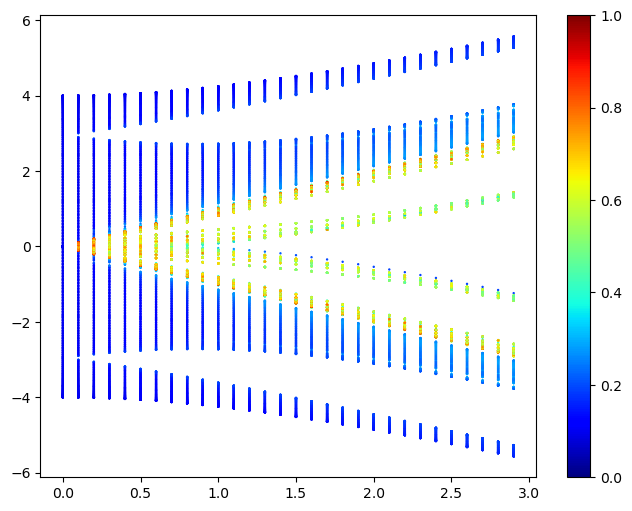

In [3]:

if __name__ == '__main__':
    L = 1000  # type 2 mosaic 尺寸1000以上，临界态 FD 才更适中，而且尺寸应该接近斐波那契数列的项，以满足PBC条件
    t0_array = np.arange(0, 3, 0.1)
    Mz = 1
    beta = (np.sqrt(5) - 1) / 2
    phi = 0

    FD = np.zeros((len(t0_array), L, 2))
    for i, t0 in enumerate(t0_array):
        Ham = gen_H_mosaic2_real(L, t0, Mz, beta, phi)
        FD[i, :, :] = cal_FD_of_all_state(Ham)
    vis_energy_spectrum(t0_array, FD)



/tmp/ipykernel_640611/3793044189.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  result[:, 0] = E


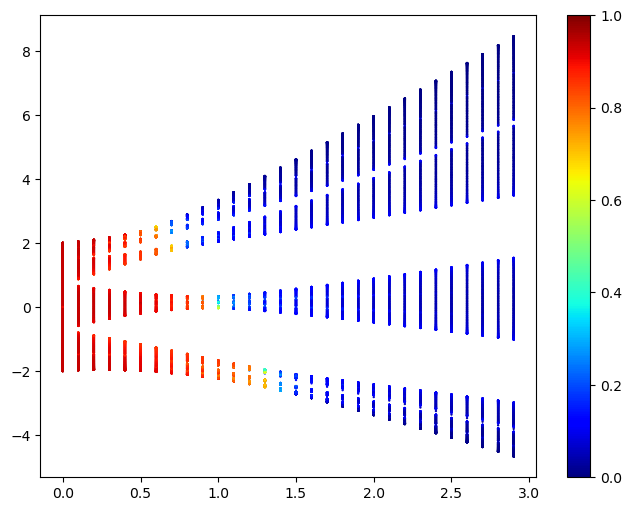

In [4]:
def gen_H_GAA_real(L, t0, lbd, a, beta, phi=0):
    Ham = np.zeros((L, L), dtype=np.complex128)
    for i in range(L - 1):
        Ham[i + 1, i] = - t0
        Ham[i, i + 1] = - t0
    Ham[L - 1, 0] = - t0
    Ham[0, L - 1] = - t0
    for i in range(L):
        Ham[i, i] = 2 * lbd * np.cos(2 * np.pi * beta * (i + 1) + phi) / (1 - a * np.cos(2 * np.pi * beta * (i + 1) + phi))
    return Ham

if __name__ == '__main__':
    L = 1000  # GAA 模型也是尺寸越大越好，但是一定要接近斐波那契数列的项（经测试也不是每一项都行），这样才满足PBC，是否PBC影响还是很大的
    t0 = 1
    lbd_array = np.arange(0, 3, 0.1)
    a = 0.3
    beta = (np.sqrt(5) - 1) / 2  # 最好还是用满足PBC的斐波那契数列
    phi = 0

    FD = np.zeros((len(lbd_array), L, 2))
    for i, lbd in enumerate(lbd_array):
        Ham = gen_H_GAA_real(L, t0, lbd, a, beta, phi)
        FD[i, :, :] = cal_FD_of_all_state(Ham)
    vis_energy_spectrum(lbd_array, FD)


/tmp/ipykernel_640611/3793044189.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  result[:, 0] = E


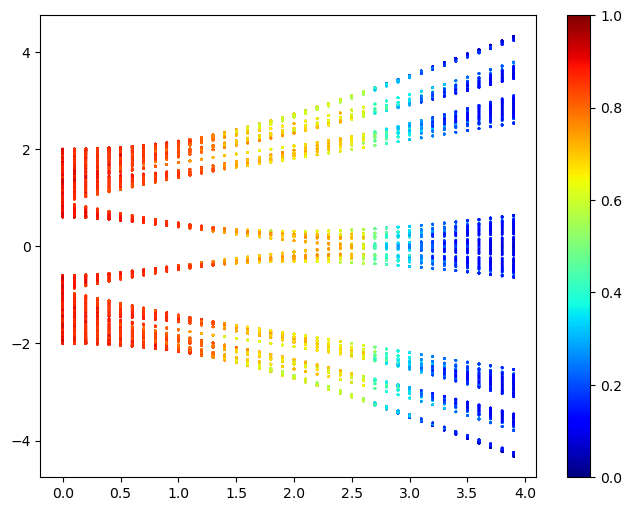

In [5]:
def gen_H_Raman_real(L, tso, Mz, beta, t0=1, phi=0):
    """
    创建实空间哈密顿量
    L 系统尺寸
    t0 自旋不变跃迁强度
    tso 自旋翻转跃迁强度
    Mz 准周期势幅值
    beta 准周期参数，一般取无理数

    编写哈密顿量时c_dagger的指标对应行
    """
    Ham = np.zeros((2 * L, 2 * L), dtype=np.complex128)
    for i in range(L - 1):
        Ham[2 * i + 2, 2 * i] = t0  # 0, 2, 4, ... down
        Ham[2 * i + 3, 2 * i + 1] = - t0  # 1, 3, 5, ... up
        Ham[2 * i + 1, 2 * i + 2] = tso
        Ham[2 * i + 3, 2 * i] = - tso
    Ham[0, 2 * (L - 1)] = t0  # PBC条件
    Ham[1, 2 * (L - 1) + 1] = - t0
    Ham[2 * (L - 1) + 1, 0] = tso
    Ham[1, 2 * (L - 1)] = - tso
    Ham += Ham.conj().T  # 加上H.c.
    for i in range(L):  # 准周期势
        Ham[2 * i, 2 * i] = - Mz * np.cos(2 * np.pi * beta * (i + 1) + phi)  # 下标从0开始，但是格点从1开始，所以i + 1
        Ham[2 * i + 1, 2 * i + 1] = Mz * np.cos(2 * np.pi * beta * (i + 1) + phi)
    return Ham


if __name__ == "__main__":
    L = fibonacci(14)
    beta = fibonacci(13) / fibonacci(14)
    tso = 0.3
    Mz_array = np.arange(0, 4, 0.1)
    FD = np.zeros((len(Mz_array), 2 * L, 2))
    for i, Mz in enumerate(Mz_array):
        Ham = gen_H_Raman_real(L, tso, Mz, beta, t0=1, phi=0)
        FD[i, :, :] = cal_FD_of_all_state(Ham)
    vis_energy_spectrum(Mz_array, FD)



/tmp/ipykernel_640611/3793044189.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  result[:, 0] = E


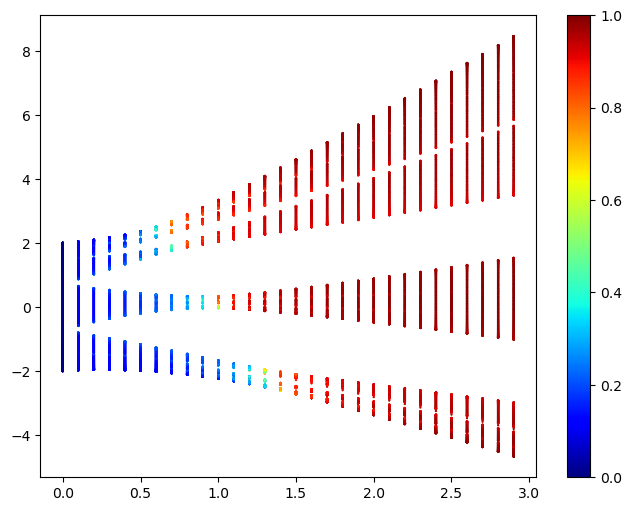

In [8]:
# 试一下动量空间的FD
def gen_H_GAA_momentum(L, t0, lbd, a, beta, phi=0):
    Ham = np.zeros((L, L), dtype=np.complex128)
    V = np.zeros(L, dtype=np.complex128)
    for i in range(L):
        V[i] = 2 * lbd * np.cos(2 * np.pi * beta * (i + 1) + phi) / (1 - a * np.cos(2 * np.pi * beta * (i + 1) + phi))
        Ham[i, i] = - t0 * 2 * np.cos(i * 2 * np.pi / L)
    for i in range(L):
        for j in range(L):
            Ham[i, j] += np.sum(V / L * np.exp( - 1j * (i - j) * 2 * np.pi / L * np.arange(L, dtype=np.complex128)))  # * 是按元素乘法， @ 是矩阵乘法
    return Ham

if __name__ == '__main__':
    L = 1000  # GAA 模型也是尺寸越大越好，但是一定要接近斐波那契数列的项（经测试也不是每一项都行），这样才满足PBC，是否PBC影响还是很大的
    t0 = 1
    lbd_array = np.arange(0, 3, 0.1)
    a = 0.3
    beta = (np.sqrt(5) - 1) / 2  # 最好还是用满足PBC的斐波那契数列
    phi = 0

    FD = np.zeros((len(lbd_array), L, 2))
    for i, lbd in enumerate(lbd_array):
        Ham = gen_H_GAA_momentum(L, t0, lbd, a, beta, phi)
        FD[i, :, :] = cal_FD_of_all_state(Ham)
    vis_energy_spectrum(lbd_array, FD)
